In [41]:
from sklearn import linear_model as lm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [29]:
data=np.loadtxt("e_car_data.csv", delimiter=',',usecols=(0,4,7,8,9), skiprows=1)
print("data.shape =",data.shape, "\n data[:10, :]=\n", data[:10, :],"\n")

data.shape = (20779, 5) 
 data[:10, :]=
 [[  2.00000000e+00   2.10000000e+04   0.00000000e+00   6.19000000e+00
    1.83880000e+00]
 [  4.00000000e+00   1.88887500e+04   1.00000000e+00   7.99000000e+00
    1.83880000e+00]
 [  1.00000000e+00   3.50000000e+04   0.00000000e+00   5.85000000e+00
    1.83880000e+00]
 [  2.00000000e+00   1.65100000e+04   1.00000000e+00   6.19000000e+00
    1.83880000e+00]
 [  1.00000000e+00   2.70000000e+04   0.00000000e+00   5.85000000e+00
    1.83880000e+00]
 [  1.00000000e+00   1.75000000e+04   0.00000000e+00   5.85000000e+00
    1.83880000e+00]
 [  2.00000000e+00   1.30242600e+04   1.00000000e+00   6.19000000e+00
    1.83880000e+00]
 [  1.00000000e+00   1.00000000e+04   1.00000000e+00   5.85000000e+00
    1.83880000e+00]
 [  2.00000000e+00   3.59600000e+04   0.00000000e+00   6.19000000e+00
    1.83880000e+00]
 [  2.00000000e+00   1.65000000e+04   1.00000000e+00   6.19000000e+00
    1.83880000e+00]] 



In [30]:
y=(data[:,2]>0)
print("y[:10]=",y[:10])
print("Fraction of loans accepted is", '%.3f'% np.mean(y))

y[:10]= [False  True False  True False False  True  True False  True]
Fraction of loans accepted is 0.451


In [31]:
data1 = data

x = np.delete(data1,2,1)
print(x)

[[  2.00000000e+00   2.10000000e+04   6.19000000e+00   1.83880000e+00]
 [  4.00000000e+00   1.88887500e+04   7.99000000e+00   1.83880000e+00]
 [  1.00000000e+00   3.50000000e+04   5.85000000e+00   1.83880000e+00]
 ..., 
 [  1.00000000e+00   5.49999000e+03   4.85000000e+00   2.12700000e+00]
 [  2.00000000e+00   2.99999900e+04   6.59000000e+00   2.12700000e+00]
 [  1.00000000e+00   3.40000000e+04   4.85000000e+00   2.12700000e+00]]


In [32]:
logistic=lm.LogisticRegression()
logistic.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
print(logistic.coef_)

[[  3.99053530e-02  -5.29466457e-05   9.39824417e-02   5.01993799e-02]]


In [34]:
ypred=logistic.predict_proba(x)
print("Error probability of logistic classifier(in-sample):", '%.3f'%(1-logistic.score(x,y)))
print("RMSE of logistic prediction of probability is: ", '%.3f'%np.std(y-ypred[:,1]))

Error probability of logistic classifier(in-sample): 0.389
RMSE of logistic prediction of probability is:  0.472


/Users/manshizou/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


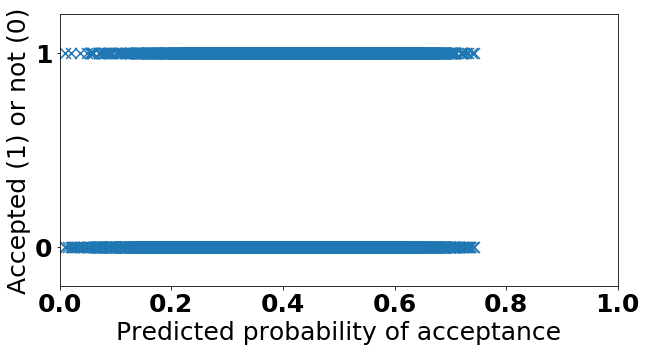

In [35]:
matplotlib.rcParams.update({'font.size': 25})
plt.figure(figsize=(10,5))
plt.scatter(ypred[:,1], y, marker = 'x', s = 120.)
plt.xlim(0, 1)
plt.ylim(-0.2, 1.2)
plt.yticks([0,1])
plt.xlabel('Predicted probability of acceptance')
plt.ylabel('Accepted (1) or not (0)')
plt.show()

In [36]:
ypred = np.array(ypred[:,1])
print(ypred)

[ 0.42190126  0.51144534  0.24451454 ...,  0.58766618  0.32312832
  0.23964002]


In [37]:
data2 =data[:,2]

sum1 = 0
correct1 = 0
sum2 = 0
correct2 = 0
sum3 = 0
correct3 = 0
sum4 = 0
correct4 = 0
sum5 = 0
correct5 = 0
a = len(data2)

for i in range(a):
    if (ypred[i] < 0.2):
        sum1 = sum1 + 1
        correct1 = correct1 + data2[i]
for i in range(a):
    if (0.2<= ypred[i])&(ypred[i]<0.4):
        sum2 = sum2 + 1
        correct2 = correct2 + data2[i]
for i in range(a):
    if (0.4<= ypred[i])&(ypred[i]<0.6):
        sum3 = sum3 + 1
        correct3 = correct3 + data2[i]
for i in range(a):
    if (0.6<= ypred[i])&(ypred[i]<0.8):
        sum4 = sum4 + 1
        correct4 = correct4 + data2[i]

for i in range(a):
    sum5 = sum5 + 1
    if (0.8<= ypred[i])&(ypred[i]<1):
        correct5 = correct5 + data2[i]
        
frac1 =correct1/sum1
frac2 =correct2/sum2
frac3 =correct3/sum3
frac4 =correct4/sum4
frac5 =correct5/sum5

/Users/manshizou/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


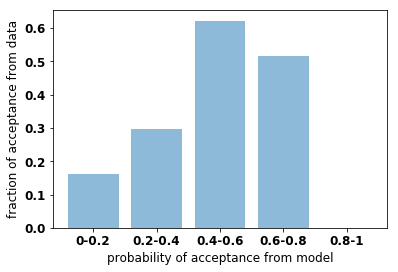

In [25]:
Group = ('0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1')
y_pos = np.arange(len(Group))
Fraction = [frac1,frac2,frac3,frac4,frac5]
plt.bar(y_pos,Fraction, align='center', alpha=0.5)
plt.xticks(y_pos, Group)


plt.ylabel('fraction of acceptance from data')
plt.xlabel('probability of acceptance from model')
 
plt.show()

In [54]:
y1 =[[2,18000,5,2.13]]

ypred1 = logistic.predict_proba(y1)

print(ypred1[:,1])


y2 =[[2,30000,5,2.13]]

ypred2 = logistic.predict_proba(y2)

print(ypred2[:,1])

[ 0.43699802]
[ 0.29137524]


In [26]:
from bs4 import BeautifulSoup
import re, urllib.parse, urllib.request

import requests

In [45]:
url ="http://www8.gsb.columbia.edu/"
maxNumUrl=50
keywords=['(?i)finance','(?i)engineering','(?i)business','(?i)research']

urls = {url:1} #queue of urls to crawl
seen = {} # stack of urls seen so far
opened = []


print(urls)


{'http://www8.gsb.columbia.edu/': 1}


In [46]:
print(urls)

{'http://www8.gsb.columbia.edu/': 1}


In [47]:
def count_score(text,key):
    accu = 0
    score = 0
    for i in range(len(key)):
        accu= len(re.findall(key[i],text))
        score= score+accu
    return score

def sort_dic(urll):
    if len(urll) == 1:
        return urll
    else:
        sort_dict1 = sorted(urll, key=urll.get, reverse=True)
        sort_dict2 = {}
        for i in sort_dict1:
            sort_dict2[i] = urll[i]
        return sort_dict2

In [48]:
while len(urls) > 0 and len(opened) < maxNumUrl:
    try:
        urls = sort_dic(urls)
        curr_url=list(urls.keys())[0]
        del urls[curr_url]
        print("num. of URLs in stack: %d " % len(urls))
        webpage=urllib.request.urlopen(curr_url)
        opened.append(curr_url)

    except Exception as ex: #if urlopen() fails
        continue  #skip code below
    soup = BeautifulSoup(webpage, "html5lib")
    htmltext = soup.get_text()
    score1 = count_score(htmltext,keywords)
    seen[curr_url] = score1
    if score1>0:
        for tag in soup.find_all('a', href = True):
            childUrl = tag['href']          #extract just the link
            original_childurl = childUrl
            childUrl = urllib.parse.urljoin(url, childUrl)
            if url in childUrl and childUrl not in seen:
                urls[childUrl]=score1
            else:
                print("######")
                
        
  
        

    
    # Put child URLs into the stack
   



print("num. of URLs seen = %d, and scanned = %d" % (len(seen), len(opened)))



num. of URLs in stack: 0 
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
num. of URLs in stack: 138 
num. of URLs in stack: 137 
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
num. of URLs in stack: 212 
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
######
num. of URLs in stack: 211 
######
######
######
######
######
######
######
######
#

######
######
num. of URLs in stack: 763 
######
######
######
######
######
######
######
######
######
######
######
######
num. of URLs in stack: 762 
######
######
######
######
######
######
######
######
######
######
######
######
num. of URLs in stack: 762 
######
######
######
######
######
######
######
######
######
######
######
######
num. of URLs in stack: 761 
######
######
######
######
######
######
######
######
######
######
######
######
num. of URLs seen = 50, and scanned = 50


In [49]:
sorted_seen = sort_dic(seen)
for i in range(25):
    print(list(sorted_seen.keys())[i], " ", list(sorted_seen.values())[i])

http://www8.gsb.columbia.edu/researcharchive/getpub/3783/p   249
http://www8.gsb.columbia.edu/faculty-research/divisions/accounting/faculty-research   60
http://www8.gsb.columbia.edu/faculty-research/faculty/awards   52
http://www8.gsb.columbia.edu/cbs-directory/detail/shp38   49
http://www8.gsb.columbia.edu/faculty-research   47
http://www8.gsb.columbia.edu/faculty-research/faculty   44
http://www8.gsb.columbia.edu/faculty-research/faculty/faculty-profiles   37
http://www8.gsb.columbia.edu/faculty-research/divisions/accounting/faculty-research/papers   37
http://www8.gsb.columbia.edu/cbs-directory/detail/dn75   36
http://www8.gsb.columbia.edu/cbs-directory/detail/sr3269   35
http://www8.gsb.columbia.edu/faculty-research/file/478   34
http://www8.gsb.columbia.edu/cbs-directory/detail/tsh1   31
http://www8.gsb.columbia.edu/   30
http://www8.gsb.columbia.edu/about-us/executives-in-residence   27
http://www8.gsb.columbia.edu/cbs-directory/detail/az50   26
http://www8.gsb.columbia.edu/rese

In [ ]:
#Question 3
#dyn-160-39-137-130:~ manshizou$ curl https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data --output my.file
#dyn-160-39-137-130:~ manshizou$ cat my.file | cut -d ',' -f 1,5 | sort -k 1nr | head -n 25 | cut -d ',' -f 2 | sort | uniq -c
#   6 Iris-versicolor
#  19 Iris-virginica

In [ ]:
#Making New Changes to this file and commit and push

In [ ]:
### Making a new change again